## Importando o Simpy

In [1]:
!pip install simpy
import simpy

## Simulação
Simulando  um linha de produção, tendo a materia prima como fila e o maquinario como serviço.

In [2]:
import matplotlib.pyplot as plt
import random

#usado para plotar
tempo_total_de_processo = 0
proc_horarios = []
proc_tempos = []

def processo(id, temp_proc):
  global tempo_total_de_processo
  while True:
    tempo_comeco = env.now
    print(f"{tempo_comeco:3d}: 🟢 Roomba[{id}] começou a processar.")
    yield env.timeout(env.now) # fica limpando pelo tempo da bateria
    
    tempo_parou = env.now
    print(f"{tempo_parou:3d}: 🟠 Roomba[{id}] terminou de processar.")
    tempo_total_de_processo += (tempo_parou - tempo_comeco)
    
    proc_horarios.append(env.now)
    proc_tempos.append(tempo_total_de_processo)

    with maquinas.request() as request:
      yield request # espera pelo acesso
      
      print(f"{env.now:3d}: 🚛 Roomba[{id}] pegando mais material.")
      #Tempo de coleta varia
      temp = random.randint(5, 100)
      yield env.timeout(temp) # carrega em 5 tempos
      print(f"{env.now:3d}: 📦 Roomba[{id}] pronto para começar.")

#Iniciando o ambiente
env = simpy.Environment()

#Criar maquinas
maquinas = simpy.Resource(env, capacity=5)

#Adiciona 20 materias-primas com tempo de processamento de 35
qtd_mat = 20
temp_proc = 35
for n in range(qtd_mat):
  env.process(processo(n, temp_proc))

env.run(until=300) # rodou o evento até o tempo 300

  0: 🟢 Roomba[0] começou a processar.
  0: 🟢 Roomba[1] começou a processar.
  0: 🟢 Roomba[2] começou a processar.
  0: 🟢 Roomba[3] começou a processar.
  0: 🟢 Roomba[4] começou a processar.
  0: 🟢 Roomba[5] começou a processar.
  0: 🟢 Roomba[6] começou a processar.
  0: 🟢 Roomba[7] começou a processar.
  0: 🟢 Roomba[8] começou a processar.
  0: 🟢 Roomba[9] começou a processar.
  0: 🟢 Roomba[10] começou a processar.
  0: 🟢 Roomba[11] começou a processar.
  0: 🟢 Roomba[12] começou a processar.
  0: 🟢 Roomba[13] começou a processar.
  0: 🟢 Roomba[14] começou a processar.
  0: 🟢 Roomba[15] começou a processar.
  0: 🟢 Roomba[16] começou a processar.
  0: 🟢 Roomba[17] começou a processar.
  0: 🟢 Roomba[18] começou a processar.
  0: 🟢 Roomba[19] começou a processar.
  0: 🟠 Roomba[0] terminou de processar.
  0: 🟠 Roomba[1] terminou de processar.
  0: 🟠 Roomba[2] terminou de processar.
  0: 🟠 Roomba[3] terminou de processar.
  0: 🟠 Roomba[4] terminou de processar.
  0: 🟠 Roomba[5] terminou de p

## Plotando
Agora vamos plotar o resultado da simulação feita a cima

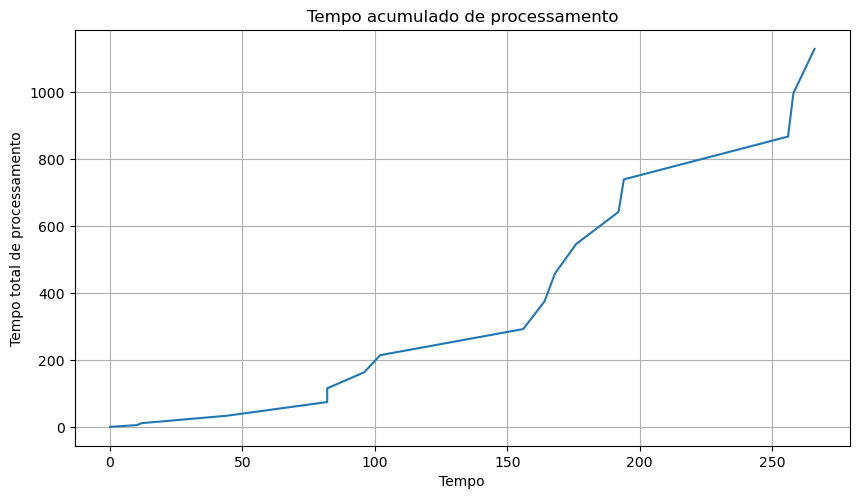

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5.4)

ax.plot(proc_horarios, proc_tempos)
ax.set_xlabel('Tempo')
ax.set_ylabel('Tempo total de processamento')
ax.set_title('Tempo acumulado de processamento')
ax.grid()